In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d dev523/leaf-disease-detection-dataset
!unzip leaf-disease-detection-dataset.zip

In [ ]:
!pip install rembg

In [2]:
import cv2
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import image as image
from google.colab.patches import cv2_imshow
from skimage.restoration import denoise_wavelet,estimate_sigma
from skimage.metrics import peak_signal_noise_ratio
import skimage.io
from rembg import remove
from PIL import Image
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy
import os
import random
import imgaug.augmenters as iaa
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
lis=["Apple___Apple_scab","Apple___Black_rot","Apple___Cedar_apple_rust","Apple___healthy","Blueberry___healthy","Cherry_(including_sour)___healthy","Cherry_(including_sour)___Powdery_mildew","Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot","Corn_(maize)___Common_rust_","Corn_(maize)___healthy"]


/usr/local/lib/python3.10/dist-packages/skimage/restoration/_denoise.py:928: UserWarning: Wavelet thresholding was designed for use with orthogonal wavelets. For nonorthogonal wavelets such as bior6.8,results are likely to be suboptimal.
  out = _wavelet_threshold(image, wavelet=wavelet, method=method,
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


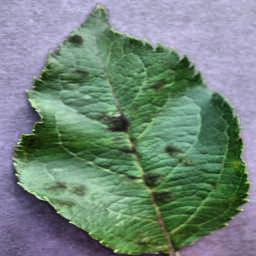

In [3]:
def preprocess_image(images,image_path=None, clip_limit=2.0, tile_size=(8, 8), sharpen_strength=1.5):

    image = cv2.imread(images)
    img_visu=denoise_wavelet(image,method='VisuShrink',mode='soft',wavelet_levels=3,wavelet='bior6.8',rescale_sigma=True,)
    img_visu_uint8 = np.clip(img_visu * 255, 0, 255).astype(np.uint8)
    image_hsv = cv2.cvtColor(img_visu_uint8, cv2.COLOR_RGB2HSV)
    i = image_hsv[:,:,2]

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_size)
    clahe_image = clahe.apply(i)
    # clahe_rgb = cv2.cvtColor(clahe_image, cv2.COLOR_GRAY2RGB)

    image_hsv[:,:,2] = clahe_image
    final_image = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
    # sharpened_image = cv2.GaussianBlur(final_image, (5, 5), 3)
    # sharpened_image = cv2.addWeighted(final_image, 1.5, sharpened_image, -0.5, 0)

    return final_image

image_path = '/content/original_image.JPG'
preprocessed_image = preprocess_image(image_path)
cv2.imwrite('/content/ii.jpg',preprocessed_image)
cv2_imshow(preprocessed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
output='/content/output.jpg'
with open(output,'wb') as f:
  ip=open('/content/ii.jpg','rb').read()
  print(ip)
  subject=remove(ip)
  f.write(subject)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x01\x00\x01\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\

100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 64.0GB/s]


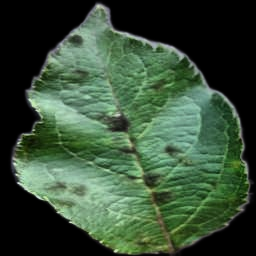

In [5]:
cv2_imshow(cv2.imread('/content/output.jpg'))

In [ ]:
import os
import cv2


def process_images(input_dir, output_dir):

    for root, dirs, files in os.walk(input_dir):

        rel_path = os.path.relpath(root, input_dir)
        output_subdir = os.path.join(output_dir, rel_path)
        #os.makedirs(output_subdir, exist_ok=True)
        print(rel_path)
        for file in files:
            input_path = os.path.join(root, file)
            lak=cv2.resize(cv2.imread(input_path),(256,256))
            ll=preprocess_image(lak)
            cv2.imwrite(input_path,ll)
            output_path = os.path.join(output_subdir, file)
            with open(output_path,'wb') as f:
             ip=open(input_path,'rb').read()
             subject=remove(ip)
             f.write(subject)

# Input and output directories
input_dir = '/content/dataset/train'
output_dir = '/content/new_dataset/train'

# Process images in the input directory and save the output in the output directory
process_images(input_dir, output_dir)

## Dataset Balancing(Image Augmentation Technique)

In [ ]:
dataset="/content/dataset/train"
table_data=[]
for dir in os.listdir(dataset):
  print(dir,":",f'{len(os.listdir(os.path.join(dataset,dir)))}')
  length=len(os.listdir(os.path.join(dataset,dir)))
  table_data.append([dir,length])
sorted_table_data = sorted(table_data, key=lambda x: x[1])
sorted_table_data

In [ ]:
seq = iaa.Sequential([
    iaa.Crop(px=(random.randint(0, 32), random.randint(0, 32))),
    iaa.Fliplr(random.uniform(0, 1)),
    iaa.Affine(scale=(random.uniform(0.8, 1.2), random.uniform(0.8, 1.2)),rotate=(-random.uniform(45, 45), random.uniform(45, 45)),
               shear=(-random.uniform(0.1, 0.2), random.uniform(0.1, 0.2)),
               translate_px=tuple(round(random.uniform(0.1, 0.2)) for _ in range(2))),
    iaa.Multiply((random.uniform(0.8, 1.2), random.uniform(0.8, 1.2)), per_channel=0.2)

])
mother_dir="/content/dataset/train"
for j in range(len(sorted_table_data)):
    if sorted_table_data[j][1]>2000:
      continue
    for i in range(2000-sorted_table_data[j][1]):
     random_number = random.randint(0, sorted_table_data[j][1]-1)
     sub_directory=os.path.join(mother_dir,sorted_table_data[j][0])
     files=os.listdir(sub_directory)
     image_path=os.path.join(sub_directory,files[random_number])
     image1=cv2.imread(image_path)
     augmented_image=seq.augment_image(image1)
     filename=f'augmented_image{i+1}.jpg'
     filename_path=os.path.join(sub_directory,filename)
     cv2.imwrite(filename_path,augmented_image)